# Exercice 3

In [90]:
#import Pkg
#Pkg.add("JuMP")
#Pkg.add("Gurobi")

using JuMP, Gurobi, DataFrames, CSV, Random, LinearAlgebra

In [91]:
#using Pkg
#Pkg.add("PyPlot")
using PyPlot

# Question a

* l0-regularization 

In [172]:
function regularized_regression_l0(y, X, ρ)
    
    M = 10000
    
    n,m = size(X)
    model = Model(solver = GurobiSolver(TimeLimit=45))
    
    @variable(model, β[1:m])
    @variable(model, z[1:m], Bin)
    
    @objective(model, Min, sum((y - X*β).^2) + ρ*sum(z))
    
    for i in 1:m
        @constraint(model, β[i] <= M * z[i])
        @constraint(model, (-β[i]) <= M * z[i])
    end
    
    sol = solve(model)
    
    return (getobjectivevalue(model), getvalue(β))
    
end

regularized_regression_l0 (generic function with 1 method)

In [179]:
function regularized_regression_l1(y, X, ρ)
    
    M = 10000
    
    n,m = size(X)
    model = Model(solver = GurobiSolver(TimeLimit=45))
    
    @variable(model, β[1:m])
    @variable(model, z[1:m])
    
    @objective(model, Min, sum((y - X*β).^2) + ρ*sum(z))
    
    for i in 1:m
        @constraint(m, (z[i]) >= β[i])
        @constraint(m, (z[i]) >= - β[i])
    end
    
    sol = solve(model)
    
    return (getobjectivevalue(model), getvalue(β))
    
end

regularized_regression_l1 (generic function with 1 method)

## Question b

In [93]:
sparseX2 = CSV.read("sparseX2.csv")
sparseY2 = CSV.read("sparseY2.csv")

,2.3428592788251605
,Float64
1,-3.04512
2,-5.90616
3,0.467956
4,-4.52402
5,1.77557
6,-1.1383
7,-3.26992
8,5.39506
9,4.66784


Creation of the validation, training and testing sets.

In [159]:
function generate_val_train_test_sets(data, output, val, test)
    n = size(data, 1)
    index = shuffle([i for i in 1:n])
    
    i_val = floor(Int,val*n)    
    i_test = floor(Int,(val+test)*n)
    
    ind_val = index[1:i_val]
    ind_test = index[i_val+1:i_test]
    ind_train = index[i_test+1:n]
    
    val_set = data[ind_val, :]
    test_set = data[ind_test, :]
    train_set = data[ind_train, :]

    val_set_output = output[ind_val, :]
    test_set_output = output[ind_test, :]
    train_set_output = output[ind_train, :]
    
    return (
        convert(Matrix,val_set), 
        convert(Matrix,test_set), 
        convert(Matrix,train_set), 
        convert(Matrix, val_set_output), 
        convert(Matrix,test_set_output),
        convert(Matrix,train_set_output)
        )
    
end

generate_val_train_test_sets (generic function with 1 method)

In [160]:
val_set, test_set, train_set, val_set_output, test_set_output, train_set_output = generate_val_train_test_sets(sparseX2, sparseY2, 0.25, 0.25)

index : [122, 90, 116, 127, 138, 87, 185, 107, 148, 136, 97, 103, 54, 113, 182, 9, 114, 98, 194, 67, 14, 165, 125, 8, 10, 120, 36, 5, 100, 131, 163, 197, 61, 26, 76, 83, 109, 159, 82, 63, 89, 52, 78, 157, 188, 43, 189, 64, 45, 85, 92, 192, 79, 154, 130, 119, 150, 88, 33, 46, 187, 7, 19, 93, 195, 175, 48, 162, 176, 191, 151, 96, 68, 31, 180, 142, 60, 174, 156, 198, 29, 152, 66, 167, 134, 15, 50, 42, 21, 181, 65, 59, 199, 112, 146, 75, 28, 128, 57, 133, 11, 158, 44, 171, 108, 186, 147, 110, 37, 94, 77, 12, 172, 74, 80, 173, 166, 25, 160, 143, 35, 111, 121, 81, 3, 153, 135, 99, 73, 24, 2, 70, 161, 18, 91, 102, 118, 34, 27, 49, 196, 190, 71, 144, 178, 17, 132, 123, 129, 1, 145, 6, 32, 105, 101, 40, 20, 139, 164, 62, 56, 140, 106, 124, 126, 4, 41, 177, 95, 137, 84, 86, 141, 58, 53, 168, 38, 149, 169, 179, 22, 117, 104, 51, 72, 47, 39, 30, 170, 193, 115, 23, 13, 155, 16, 69, 183, 55, 184]
i_val : 49
ind_val : [122, 90, 116, 127, 138, 87, 185, 107, 148, 136, 97, 103, 54, 113, 182, 9, 114, 98,

([1.1540597669111703 0.8156139596767987 … 0.17539442072242212 -0.6724855811748534; -1.7098682060045913 2.1299921566412503 … 0.41824798687303055 -0.9263087122572096; … ; 1.174681325975111 1.4678868411216563 … 1.538364868393089 -0.9556914030518779; 0.7593902139454598 -0.06596847546469198 … 0.9513758028848546 0.9041129663812132], [1.5231753911772645 0.2059465326047665 … 1.078559722835045 1.5396416080605901; -0.1289156385300165 -0.23211025519653547 … 0.05734765946819415 0.41097459032249994; … ; 0.658322671059814 -0.5775086066033142 … 0.48131839739460924 -0.8103065724158262; -0.6161166660088192 -1.6190985435203415 … -1.6490189263708104 0.27883605621823027], [-0.20212227601885754 -0.5108631833174244 … 1.829723716858734 0.19690357059596286; -0.7576330377205277 0.3254542082853489 … -0.5979137392321 -0.7811232903468176; … ; -1.3851080676759138 -0.29961787965293785 … 0.3717303873230274 1.6368541078980345; 0.3638388194911837 0.131810280826272 … -0.8177566148103238 -1.0121874853029817], [-2.435464

We choose ρ as the value that gives the best mean squared prediction error on the validation set.

Mean Square Error

In [141]:
function mean_square_error(y_real, y_output)
    return sum((y_real - y_output).^2)
end

mean_square_error (generic function with 1 method)

In [142]:
function compute_error_l0(rho, set, output_set)
    beta = regularized_regression_l0(train_set_output, train_set, rho)
    error = mean_square_error(output_set, set * beta)
    return error
end

compute_error_l0 (generic function with 1 method)

In [ ]:
function compute_error_l1(rho, set, output_set)
    beta = regularized_regression_l1(train_set_output, train_set, rho)
    error = mean_square_error(output_set, set * beta)
    return error
end

In [176]:
#rho_test = vcat([0.0001, 0.001, 0.01, 0.1, 1], [i*10 for i in 1:30])
rho_test = [i for i=1:10]

50-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
 13
  ⋮
 39
 40
 41
 42
 43
 44
 45
 46
 47
 48
 49
 50

In [177]:
error_l0 = zeros(length(rho_test))

for i in 1:length(rho_test)
    error_l0[i] = compute_error_l0(rho_test[i], val_set, val_set_output)
end

Academic license - for non-commercial use only
Optimize a model with 200 rows, 200 columns and 400 nonzeros
Model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [6e-01, 3e+02]
  QObjective range [2e-02, 3e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Found heuristic solution: objective 0.0000000
Presolve time: 0.00s
Presolved: 200 rows, 200 columns, 400 nonzeros
Presolved model has 5050 quadratic objective terms
Variable types: 100 continuous, 100 integer (100 binary)

Root relaxation: objective -9.807335e+02, 1128 iterations, 0.07 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 -980.73345    0   90    0.00000 -980.73345      -     -    0s
H    0     0                    -890.7389678 -980.73345  10.1%     -    0s
   

MethodError: MethodError: no method matching *(::Array{Float64,2}, ::Tuple{Float64,Array{Float64,1}})
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529
  *(!Matched::PyCall.PyObject, ::Any) at /Users/gabriellerappaport/.julia/packages/PyCall/ttONZ/src/pyoperators.jl:13
  *(::Union{Array{T,2} where T, SparseArrays.SparseMatrixCSC}, !Matched::Union{Array{T<:Union{JuMP.AbstractJuMPScalar, JuMP.GenericNormExpr{2,Float64,Variable}, JuMP.NonlinearExpression, JuMP.GenericNorm{P,Float64,Variable} where P},2}, Array{T<:Union{JuMP.AbstractJuMPScalar, JuMP.GenericNormExpr{2,Float64,Variable}, JuMP.NonlinearExpression, JuMP.GenericNorm{P,Float64,Variable} where P},1}, SparseArrays.SparseMatrixCSC{T<:Union{JuMP.AbstractJuMPScalar, JuMP.GenericNormExpr{2,Float64,Variable}, JuMP.NonlinearExpression, JuMP.GenericNorm{P,Float64,Variable} where P},Ti} where Ti<:Integer}) where T<:Union{JuMP.AbstractJuMPScalar, JuMP.GenericNormExpr{2,Float64,Variable}, JuMP.NonlinearExpression, JuMP.GenericNorm{P,Float64,Variable} where P} at /Users/gabriellerappaport/.julia/packages/JuMP/I7whV/src/operators.jl:473
  ...

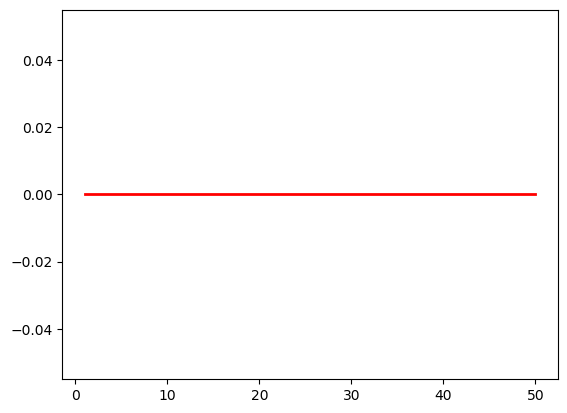

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1520b6978>

In [178]:
plot(rho_test, error_l0, color="red", linewidth=2.0)      

Compute ∥y − Xβ∥2 on the testing set using the β’s from l0-regularized, l1-regularized linear regression, l2- regularized linear regression, and standard linear regression (ρ = 0)

In [102]:
l0_error = compute_error_l0(rho_l0, test_set, test_set_output)

UndefVarError: UndefVarError: rho_l0 not defined

In [103]:
l1_error = compute_error_l1(rho_l1, test_set, test_set_output)

UndefVarError: UndefVarError: compute_error_l1 not defined

In [104]:
l2_error = compute_error_l2(rho_l2, test_set, test_set_output)

UndefVarError: UndefVarError: compute_error_l2 not defined